In [1]:
''' Image recognition for Fashion
    Start with importing our training data 
    
    Let's also take a look at the labels
    0 T-shirt/top
    1 Trouser
    2 Pullover
    3 Dress
    4 Coat
    5 Sandal
    6 Shirt
    7 Sneaker
    8 Bag
    9 Ankle boot '''
import pandas as pd

X_data_train = pd.read_csv("Data/fashion-mnist_train.csv")
y_data_train = X_data_train.pop("label")

X_data_test = pd.read_csv("Data/fashion-mnist_test.csv")
y_data_test = X_data_test.pop("label")

In [2]:
''' Let's take a first look at the data '''
X_data_train.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,14.488767,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,38.334549,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [3]:
y_data_train.describe()

count    60000.000000
mean         4.500000
std          2.872305
min          0.000000
25%          2.000000
50%          4.500000
75%          7.000000
max          9.000000
Name: label, dtype: float64

In [4]:
X_data_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 358.9 MB


In [6]:
X_data_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,5,4,5,5,3,5,6,...,7,8,7,4,3,7,5,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,3,2,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [7]:
''' Let's convert our data into numpy arrays '''
import numpy as np

X_train = np.array(X_data_train)
y_train = np.array(y_data_train)

X_test = np.array(X_data_test)
y_test = np.array(y_data_test)

In [8]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

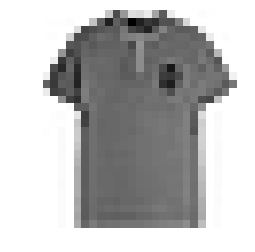

In [9]:
''' Let's take a look at one of the pictures '''
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def plot_cloth(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

some_digit = X_train[30000]
plot_cloth(some_digit)

In [10]:
''' The picture looks like a 0 T-shirt and when we check the label we see
    that it correctly is 0 which is a T-shirt/top '''
y_train[30000]

0

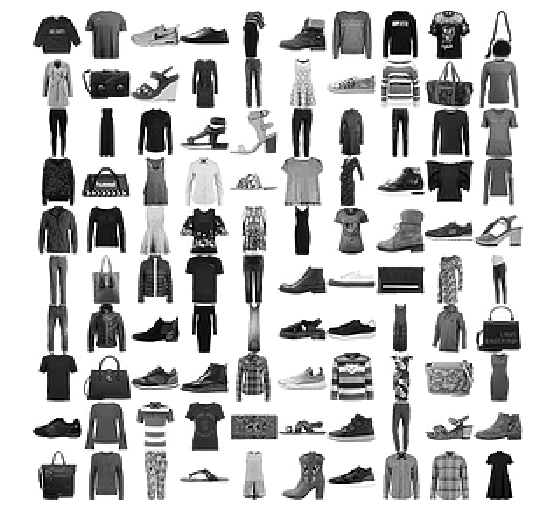

In [11]:
''' Lets write a function to display some more cloths in a single picture '''
def plot_cloths(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(9,9))
example_images = np.r_[X_train[:12000:600], X_train[13000:30600:600], X_train[30600:60000:590]]
plot_cloths(example_images, images_per_row=10)
plt.show()

In [12]:
''' Let's shuffle the data before we use it '''
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [13]:
''' Ok for now I'm happy with the data.
    Time to pick a model to train.
    I will start with a RandomForestClassifier since I want a multiclass classifier '''
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
''' Ok lets take a look at how well the RandomForestClassifier did '''
forest_clf.predict([some_digit])

array([0], dtype=int64)

In [15]:
forest_clf.predict_proba([some_digit])

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [16]:
from sklearn.model_selection import cross_val_score

cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.85625, 0.8555 , 0.8538 ])

In [17]:
''' For a better overview of our score we will use a confusion matrix '''
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5116,   10,   89,  211,   25,    5,  502,    0,   42,    0],
       [  39, 5767,   28,  121,   13,    1,   27,    0,    4,    0],
       [  80,    7, 4773,   62,  696,    0,  346,    0,   36,    0],
       [ 208,   54,   74, 5343,  185,    0,  124,    0,   12,    0],
       [  27,    9,  731,  286, 4607,    2,  323,    0,   15,    0],
       [   2,    0,    1,    3,    0, 5696,    0,  194,   27,   77],
       [1106,   17,  796,  184,  618,    5, 3183,    1,   90,    0],
       [   0,    0,    0,    0,    0,  212,    0, 5523,   11,  254],
       [  28,    6,   42,   32,   26,   42,   77,   14, 5729,    4],
       [   2,    0,    1,    6,    1,  103,    1,  263,    8, 5615]],
      dtype=int64)

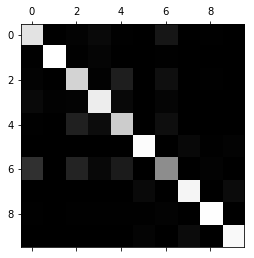

In [18]:
''' Let's display the concusion matrix with a grayscale instead of numbers '''
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

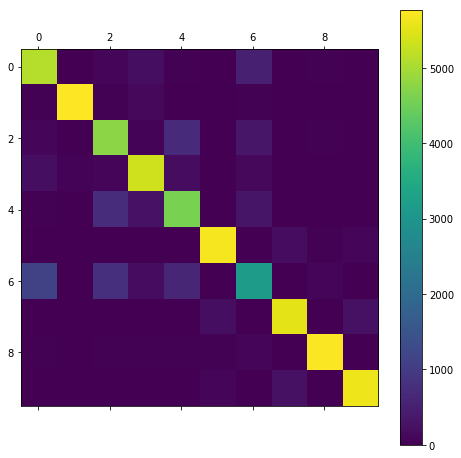

In [19]:
''' Or even better, let's add some colors '''
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)
    
plot_confusion_matrix(conf_mx)

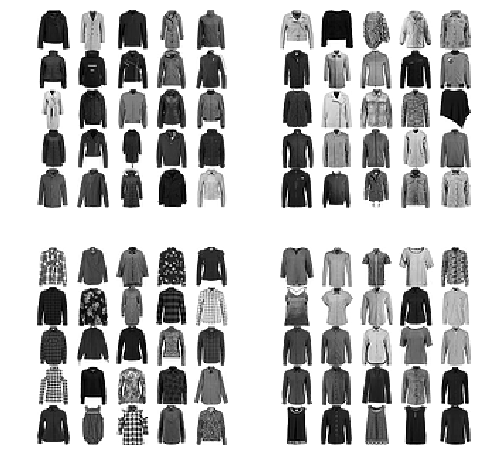

In [20]:
''' We see that our model has problems predicting 6(Shirt) and 4(Coat)
    The two left blocks is images classified as coats and the two right blocks
    is images classified as shirts.
    The upper right block and lower left block is incorrectly classified images '''


def Plot_Error_Analysis(cl_a, cl_b):
    X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
    X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
    X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
    X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

    plt.figure(figsize=(8,8))
    plt.subplot(221); plot_cloths(X_aa[:25], images_per_row=5)
    plt.subplot(222); plot_cloths(X_ab[:25], images_per_row=5)
    plt.subplot(223); plot_cloths(X_ba[:25], images_per_row=5)
    plt.subplot(224); plot_cloths(X_bb[:25], images_per_row=5)
    plt.show()

Plot_Error_Analysis(4, 6)

In [21]:
''' Let's test a MLP.
    We start by defnining the layers. '''

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [22]:
''' Now we will prepare the data for the training.
    First we will convert our features into floats.
    Then we will create a validation set from our training data
    Finaly we will normalize our data so it's in a range of 0 to 1 '''
from sklearn.model_selection import train_test_split

X_train_f = X_train.astype(np.float32)
X_test_f = X_test.astype(np.float32)

X_train_f, X_valid_f, y_train, y_valid = train_test_split(X_train_f, y_train, test_size=0.2, random_state=13)
X_train_f /= 255
X_test_f /= 255
X_valid_f /= 255

In [23]:
print("Xtrain: ", int(len(X_train_f)), " + Xvalid: ", int(len(X_valid_f)))
print("ytrain: ", int(len(y_train)), " + yvalid: ", int(len(y_valid)))

Xtrain:  48000  + Xvalid:  12000
ytrain:  48000  + yvalid:  12000


In [24]:
X_train_f

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
''' Next we create placeholder nodes for x and y '''
import tensorflow as tf

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [26]:
''' Let's setup our MLP '''
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [27]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar('log_loss', loss)

In [28]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [29]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [30]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [31]:
''' Before we can start we need to define the directory to write the TensorBoard logs to '''
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [32]:
logdir = log_dir("/MLP")

In [33]:
''' Now we create the FileWriter ''' 
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [34]:
''' Let's create a function to get a batch of data and labels
    And a faction and returns a random batch of data and labels '''

def next_batch(num, iteration, data, labels):
    start = num * iteration
    end = start + num
    data_batch = data[start:end]
    labels_batch = labels[start:end]
    return data_batch, labels_batch

def next_batch_incremental(num, iteration, data, labels):
    start = num * iteration
    end = start + (num * iteration)
    data_batch = data[start:end]
    labels_batch = labels[start:end]
    return data_batch, labels_batch

def next_batch_random(num, data, labels):
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [35]:
m, n = X_train_f.shape

In [36]:
''' Now it's time to run our MLP '''

n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

final_model_path = "/TensorBoard/my_deep_mlp_mnist_model"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

with tf.Session() as sess:
    start_epoch = 0
    sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for iteration in range(int(len(X_train_f)) // batch_size):
            X_batch, y_batch = next_batch(num=batch_size, iteration=iteration, data=X_train_f, labels=y_train)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            
        accuracy_train = sess.run(accuracy, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = sess.run(accuracy, feed_dict={X: X_valid_f, y: y_valid})
        loss_val = sess.run(loss, feed_dict={X: X_valid_f, y: y_valid})
        
        accuracy_summary_str = sess.run(accuracy_summary, feed_dict={X: X_valid_f, y: y_valid})
        loss_summary_str = sess.run(loss_summary, feed_dict={X: X_valid_f, y: y_valid})
        
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        
        if epoch % 5 == 0:
            print("Epoch:", epoch,
                  "\tTrain accuracy: {:.3f}%".format(accuracy_train * 100),
                  "\tValidation accuracy: {:.3f}%".format(accuracy_val * 100),
                  "\tLoss: {:.5f}".format(loss_val))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stopping")
                    break

Epoch: 0 	Train accuracy: 86.000% 	Validation accuracy: 80.933% 	Loss: 0.56936
Epoch: 5 	Train accuracy: 86.000% 	Validation accuracy: 85.483% 	Loss: 0.41927
Epoch: 10 	Train accuracy: 86.000% 	Validation accuracy: 86.658% 	Loss: 0.38461
Epoch: 15 	Train accuracy: 86.000% 	Validation accuracy: 87.317% 	Loss: 0.36487
Epoch: 20 	Train accuracy: 86.000% 	Validation accuracy: 87.717% 	Loss: 0.35111
Epoch: 25 	Train accuracy: 86.000% 	Validation accuracy: 87.858% 	Loss: 0.34154
Epoch: 30 	Train accuracy: 86.000% 	Validation accuracy: 88.217% 	Loss: 0.33449
Epoch: 35 	Train accuracy: 88.000% 	Validation accuracy: 88.417% 	Loss: 0.32879
Epoch: 40 	Train accuracy: 90.000% 	Validation accuracy: 88.567% 	Loss: 0.32589
Epoch: 45 	Train accuracy: 90.000% 	Validation accuracy: 88.725% 	Loss: 0.32264
Epoch: 50 	Train accuracy: 90.000% 	Validation accuracy: 88.717% 	Loss: 0.32199
Epoch: 55 	Train accuracy: 92.000% 	Validation accuracy: 88.850% 	Loss: 0.32240
Epoch: 60 	Train accuracy: 92.000% 	Valida

In [37]:
''' Let's see if we can do better if we remove some noice from our data '''
X_train_clean = X_train_f
X_train_clean[X_train_clean < 0.007] = 0
X_train_clean[20]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01568628, 0.        ,
       0.        , 0.45882353, 0.8980392 , 0.6039216 , 0.6666667 ,
       0.7294118 , 0.8784314 , 0.36078432, 0.        , 0.01568628,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0627451 , 0.9529412 ,
       0.9529412 , 0.99607843, 0.9529412 , 0.9490196 , 0.9607843 ,
       0.84313726, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.2784314 ,
       0.60784316, 0.98039216, 0.8352941 , 0.8784314 , 0.9137255 ,
       0.77254903, 0.93333334, 0.85882354, 0.85882354, 0.76078

In [38]:
''' Let's convert the labels into one-hot arrays '''
import sklearn.preprocessing

label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(y_train)+1))
y_train_1hot = label_binarizer.transform(y_train)

label_binarizer.fit(range(max(y_valid)+1))
y_valid_1hot = label_binarizer.transform(y_valid)

y_train_1hot

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [39]:
tf.reset_default_graph()

learning_rate = 0.01

X_train_dict = {"x":X_train_f}
X_train_unflattened = np.reshape(X_train_dict["x"], (-1, 28, 28, 1))

#X = tf.placeholder(tf.float32, shape=(None, 28, 28, 1), name="X")
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.float32, shape=(None, n_outputs), name="y")
training = tf.placeholder_with_default(False, shape=(), name="training")

with tf.name_scope("dnn"):
    input_layer = tf.reshape(X, [-1, 28, 28, 1], name="reshape1")
    
    conv1 = tf.layers.conv2d(input_layer, filters=32, kernel_size=[5, 5],
                             padding="same", name="conv1", activation=tf.nn.relu)
    pool1 = tf.layers.max_pooling2d(conv1, pool_size=[2, 2], strides=2, name="pool1")
    conv2 = tf.layers.conv2d(pool1, filters=64, kernel_size=[5, 5],
                             padding="same", name="conv2",activation=tf.nn.relu)
    pool2 = tf.layers.max_pooling2d(conv2, pool_size=[2, 2], strides=2, name="pool2")
    pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64], name="reshape2")
    dense1 = tf.layers.dense(pool2_flat, units=1024, activation=tf.nn.relu, name="dense1")
    dropout = tf.layers.dropout(inputs=dense1, rate=0.4, training=training)
    logits = tf.layers.dense(dense1, units=n_outputs, name="outputs")
    
    ''' predictions = { "classes": tf.argmax(input=logits, axis=1)
                   ,"probabilities": tf.nn.softmax(logits, name="softmax_tensor") } '''
    
with tf.name_scope("loss"):
    xentropy = tf.losses.softmax_cross_entropy(onehot_labels=y, logits=logits)
    #xentropy = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar('log_loss', loss)
    
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    #correct = tf.nn.in_top_k(logits, y, 1)
    correct = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

logdir = log_dir("/CNN")
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

m, n = X_train_f.shape

In [41]:
''' Using our CNN without with dropout '''
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

final_model_path = "/TensorBoard/my_deep_mnist_model"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 1

init = tf.global_variables_initializer()

with tf.Session() as sess:
    start_epoch = 0
    sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for iteration in range(int(len(X_train_f)) // batch_size):
            X_batch, y_batch = next_batch(num=batch_size, iteration=iteration,
                                          data=X_train_f, labels=y_train_1hot)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})
            
        accuracy_train = sess.run(accuracy, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = sess.run(accuracy, feed_dict={X: X_valid_f, y: y_valid_1hot})
        loss_val = sess.run(loss, feed_dict={X: X_valid_f, y: y_valid_1hot})
        
        accuracy_summary_str = sess.run(accuracy_summary, feed_dict={X: X_valid_f, y: y_valid_1hot})
        loss_summary_str = sess.run(loss_summary, feed_dict={X: X_valid_f, y: y_valid_1hot})
        
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        
        if epoch % 5 == 0:
            print("Epoch:", epoch,
                  "\tTrain accuracy: {:.3f}%".format(accuracy_train * 100),
                  "\tValidation accuracy: {:.3f}%".format(accuracy_val * 100),
                  "\tLoss: {:.5f}".format(loss_val))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stopping")
                    break

Epoch: 0 	Train accuracy: 84.000% 	Validation accuracy: 78.492% 	Loss: 0.59889
Epoch: 5 	Train accuracy: 84.000% 	Validation accuracy: 87.058% 	Loss: 0.36559
Epoch: 10 	Train accuracy: 84.000% 	Validation accuracy: 88.808% 	Loss: 0.31900
Epoch: 15 	Train accuracy: 92.000% 	Validation accuracy: 89.350% 	Loss: 0.29662
Epoch: 20 	Train accuracy: 96.000% 	Validation accuracy: 89.883% 	Loss: 0.28728
Epoch: 25 	Train accuracy: 96.000% 	Validation accuracy: 90.308% 	Loss: 0.28086
Epoch: 30 	Train accuracy: 96.000% 	Validation accuracy: 90.667% 	Loss: 0.27850
Epoch: 35 	Train accuracy: 98.000% 	Validation accuracy: 90.742% 	Loss: 0.28057
Early stopping
